In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def rule_30(p,q,r):
    return np.logical_xor(p,np.logical_or(q , r)).astype(int)

In [3]:
num_samples = 10000
for case in range(1,11):
    p = np.random.choice([0,1], num_samples)
    q = np.random.choice([0,1], num_samples)
    r = np.random.choice([0,1], num_samples)
    s = rule_30(p,q,r)
    np.save('Experiments/sim_data/training/training{}.npy'.format(case),np.array([p,q,r,s]))

In [4]:
def CA_run_step(old_grid,size):
    new_grid = np.zeros((1,size))
    for j in range(1,size-1):
            p = old_grid[0,j-1]
            q = old_grid[0,j]
            r = old_grid[0,j+1]
            s = rule_30(p,q,r)
            new_grid[0,j] = s
    return new_grid

In [25]:
l= []
size = 1001
grid = np.random.random_integers(0,high=1, size=(1,size))
# grid = np.zeros((1,size))
# grid[0,int((size+1)/2)] = 1
tsteps = 1000
tmp = []
tmp.append(grid)
for i in range(tsteps):
    grid = CA_run_step(grid,size)
    l.append(np.count_nonzero(grid)/(size-np.count_nonzero(grid)))
    tmp.append(grid)

C:\Users\sdw\AppData\Local\Temp\ipykernel_21972\4013822061.py:3: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  grid = np.random.random_integers(0,high=1, size=(1,size))


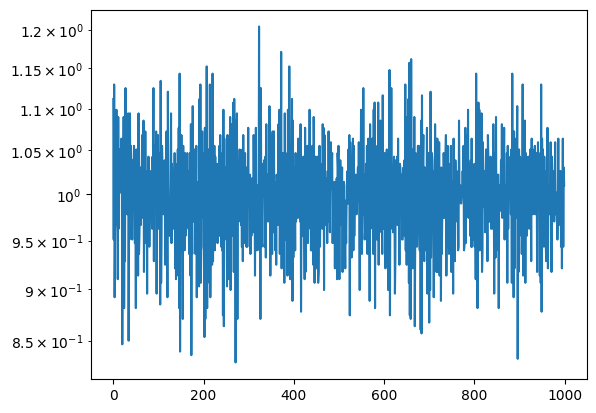

In [26]:
plt.semilogy(l)

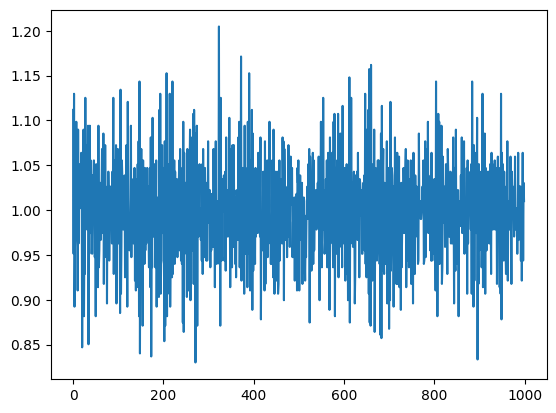

In [27]:
plt.plot(l)

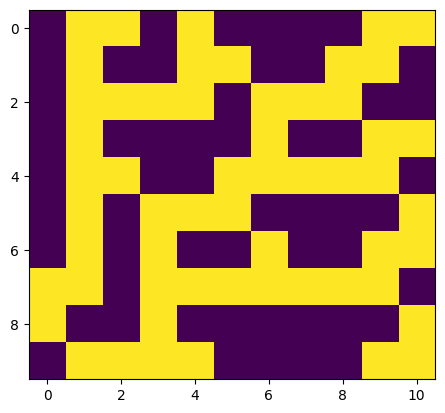

In [28]:
plt.imshow(np.asarray(tmp)[:10,0,496:507])